<h1> Accumulation or distribution?

In [201]:
# Setting
import pandas as pd 
import numpy as np
import yfinance as yf

In [202]:
# Let's use vanguard FTSE all world
acc = yf.download("VWCE.MI").reset_index()
div = yf.download("VWRL.MI").reset_index()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [203]:
div_filter = div.loc[div["Date"] >= "2020-01-14"].reset_index()

if len(acc) == len(div_filter):
    print(True)

div_filter    

True


,index,Date,Open,High,Low,Close,Adj Close,Volume
0,248,2020-01-14,84.839996,85.300003,84.839996,85.110001,77.985954,3326
1,249,2020-01-15,85.050003,85.129997,84.629997,84.959999,77.848511,4097
2,250,2020-01-16,85.190002,85.379997,84.970001,85.349998,78.205856,2568
3,251,2020-01-17,85.800003,86.169998,85.660004,86.010002,78.810616,4326
4,252,2020-01-20,86.080002,86.180000,86.000000,86.099998,78.893074,2502
...,...,...,...,...,...,...,...,...
1258,1506,2024-12-16,134.470001,134.960007,133.539993,134.789993,134.789993,11598
1259,1507,2024-12-17,134.330002,134.600006,134.059998,134.279999,134.279999,12780
1260,1508,2024-12-18,134.529999,134.860001,134.229996,134.660004,134.660004,7031
1261,1509,2024-12-19,132.509995,132.949997,132.080002,132.740005,132.740005,17893


In [204]:
# Get info about the amount of dividend paid
div_object = yf.Ticker("VWRL.MI")

div_dividend = div_object.get_dividends().reset_index()

oggi = "2024-12-22"

div_dividend_filter = div_dividend.loc[(div_dividend["Date"] >= "2020-01-14") & (div_dividend["Date"] <= oggi)]

div_dividend_filter["Date"] = [i.date() for i in div_dividend_filter["Date"]]

div_dividend_filter

C:\Users\39340\AppData\Local\Temp\ipykernel_31920\2979395310.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  div_dividend_filter["Date"] = [i.date() for i in div_dividend_filter["Date"]]


,Date,Dividends
4,2020-03-26,0.370377
5,2020-06-11,0.334940
6,2020-09-24,0.390557
7,2020-12-17,0.255469
8,2021-03-18,0.283446
9,2021-06-17,0.486702
10,2021-09-16,0.384213
11,2021-12-16,0.408795
12,2022-03-17,0.294676
13,2022-06-16,0.798834


In [205]:
data_etf = pd.DataFrame(data = {"Date": acc["Date"],
                                "Acc Price": acc["Adj Close"],
                                "Dist Price": div_filter["Adj Close"]})

data_etf["Date"] = [i.date() for i in data_etf["Date"]]

data_etf = data_etf.merge(div_dividend_filter, on = "Date", how = "left")

data_etf

,Date,Acc Price,Dist Price,Dividends
0,2020-01-14,78.620003,77.985954,NaN
1,2020-01-15,78.570000,77.848511,NaN
2,2020-01-16,78.870003,78.205856,NaN
3,2020-01-17,79.540001,78.810616,NaN
4,2020-01-20,79.529999,78.893074,NaN
...,...,...,...,...
1258,2024-12-16,135.929993,134.789993,NaN
1259,2024-12-17,135.429993,134.279999,NaN
1260,2024-12-18,135.800003,134.660004,NaN
1261,2024-12-19,133.820007,132.740005,NaN


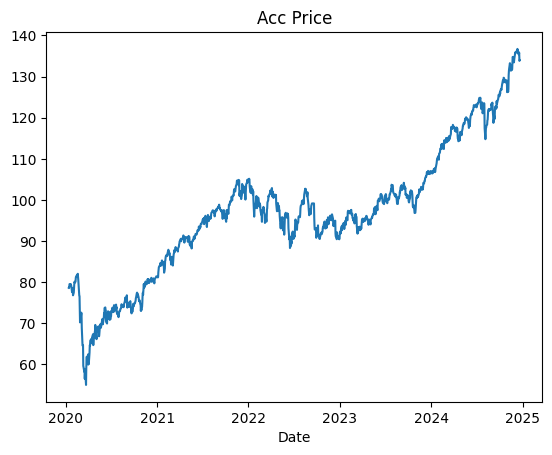

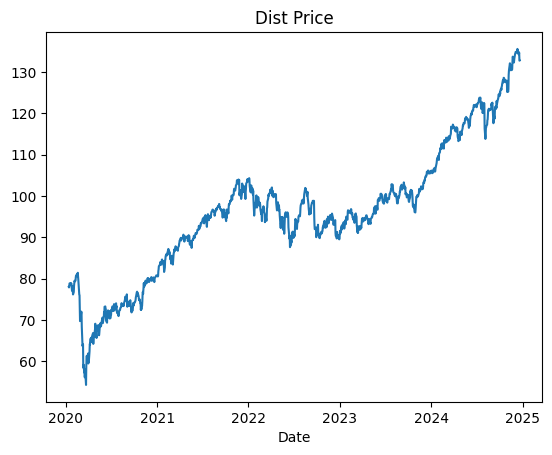

In [206]:
# Visualize
grafico = ["Acc Price", "Dist Price"]

for k in grafico:
    data_etf.plot(x = "Date", y = k, title = k, legend = False)

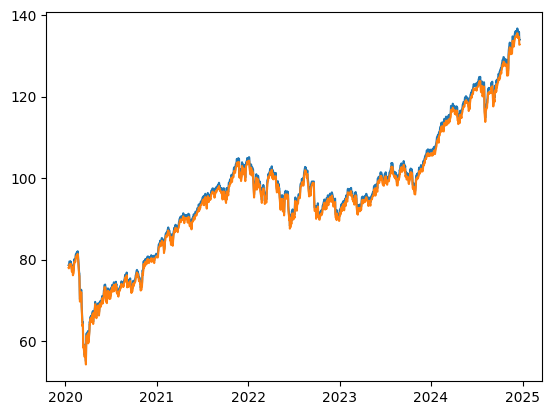

In [207]:
import matplotlib.pyplot as plt

plt.plot(data_etf["Date"], data_etf["Acc Price"])
plt.plot(data_etf["Date"], data_etf["Dist Price"])

In [208]:
# How much I get from dividend in the same period of time?
number_div = data_etf["Dividends"].count() # 20 dividend paid during that period of time

total_amount = data_etf["Dividends"].sum(skipna=True)

print(f"During that period of time I get {total_amount} split into {number_div} dividends.")

During that period of time I get 8.678548 split into 20 dividends.


In [209]:
# Yield Accumulation vs Distribution
diff_days = (data_etf["Date"][len(data_etf)-1] - data_etf["Date"][0]).days

rend_acc = (data_etf["Acc Price"][len(data_etf)-1]/data_etf["Acc Price"][0])**(1/(diff_days/365))-1
rend_dist = (data_etf["Dist Price"][len(data_etf)-1]/data_etf["Dist Price"][0])**(1/(diff_days/365))-1
diff_rendimento = rend_acc - rend_dist

print(f"Rendimenti annuali: accumulation {round(rend_acc, 5)*100}; distribution {round(rend_dist, 5)*100}. Differenza pari a {round(diff_rendimento, 5)*100}")

Rendimenti annuali: accumulation 11.398; distribution 11.382. Differenza pari a 0.017


In [210]:
# Rendiemtno dividendi
dividend_return = (total_amount/data_etf["Dist Price"][0])/(diff_days/365)

dividend_return

0.022540770478986404

In [211]:
# Rendimento 
capitale = 1000

inv_accumulo = capitale * (1 + rend_acc)**(diff_days/365)
inv_distribution = capitale * (1 + rend_dist)**(diff_days/365)
inv_distribution_dividend = capitale * (1 + dividend_return)

differenza_assoluta = inv_accumulo - inv_distribution

lordo_gain = total_amount - differenza_assoluta

rendimento_addizionale = lordo_gain/capitale

inv_distribution_dividend

1022.5407704789864

In [212]:
# Simulazione di investimento
capitale = 1000
tax_rate = 0.26
num_quote_acc = capitale / data_etf["Acc Price"][0]

etf_accumulo = (num_quote_acc * data_etf["Acc Price"][len(data_etf)-1] - num_quote_acc * data_etf["Acc Price"][0])*(1-tax_rate)
etf_accumulo  # 520.8802023041313

520.8802023041313

In [213]:
import math

numero_quote_dist = capitale / data_etf["Dist Price"][0]

etf_distribution_capital_gain = (numero_quote_dist * data_etf["Dist Price"][len(data_etf)-1] - numero_quote_dist * data_etf["Dist Price"][0])*(1-tax_rate)
etf_distribution_capital_gain # 519.9344380076417

519.9345612674903

In [229]:
dividendi_netti = []
for i in data_etf["Dividends"]:
    if math.isnan(i):
        pass
    else:
        dividendi_netti.append((i * numero_quote_dist)*(1-tax_rate)) 

etf_distribution = etf_distribution_capital_gain + sum(dividendi_netti)

etf_distribution

602.2843328245281

In [228]:
# Strategia di reinvestimento
quote = [numero_quote_dist]
dividendi_incassati = []

d = 0
q = 0
for i in data_etf["Dividends"]:
    if not math.isnan(i):
        div_netto = (quote[q]*i)*(1-tax_rate)
        dividendi_incassati.append(div_netto)
        quote.append(quote[q] + div_netto/data_etf["Dist Price"][d])
        q = q + 1
    d = d + 1  

etf_distribution_reinvestimento = etf_distribution_capital_gain +  sum(dividendi_incassati)

etf_distribution_reinvestimento

605.2532613944418

In [238]:
# Risultati 
# Nessun reinvestimento
gain_distribution_no_reinvestimento = etf_distribution - etf_accumulo
# Con reinvestimento
gain_distribution_reinvestimento = etf_distribution_reinvestimento - etf_accumulo

print(f"Risultato con reinvestimento {etf_distribution_reinvestimento:.2f}; senza reinvestimento {etf_distribution:.2f}; accumulo {etf_accumulo:.2f}")
print(f"Risultato con reinvestimento vs accumulo {(etf_distribution_reinvestimento - etf_accumulo):.2f}; senza reinvestimento vs accumulo {(etf_distribution - etf_accumulo):.2f}; reinvestimento vs senza {(etf_distribution_reinvestimento-etf_distribution):.2f}")

Risultato con reinvestimento 605.25; senza reinvestimento 602.28; accumulo 520.88
Risultato con reinvestimento vs accumulo 84.37; senza reinvestimento vs accumulo 81.40; reinvestimento vs senza 2.97


(array([144., 119., 500., 224.,  90., 108.,  45.,  16.,  12.,   5.]),
 array([ -14.99153027,   92.64646914,  200.28446856,  307.92246797,
         415.56046739,  523.1984668 ,  630.83646622,  738.47446563,
         846.11246505,  953.75046446, 1061.38846388]),
 <BarContainer object of 10 artists>)

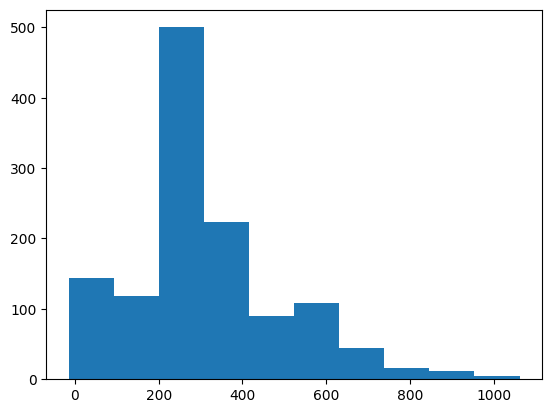

In [ ]:
# Simulazione Accumulo
capitale = 1000
tax_rate = 0.26

risultati_accumulo = []

for i in range(0, len(data_etf)):
    num_quote = capitale / data_etf["Acc Price"][i]
    acc_simulation = ((num_quote * data_etf["Acc Price"][len(data_etf)-1]) - (num_quote * data_etf["Acc Price"][i]))*(1-tax_rate)
    risultati_accumulo.append(acc_simulation)

plt.hist(risultati_accumulo)

(array([152., 115., 503., 209.,  88., 112.,  51.,  17.,  11.,   5.]),
 array([ -12.9207844 ,  107.31476303,  227.55031045,  347.78585787,
         468.0214053 ,  588.25695272,  708.49250014,  828.72804757,
         948.96359499, 1069.19914241, 1189.43468984]),
 <BarContainer object of 10 artists>)

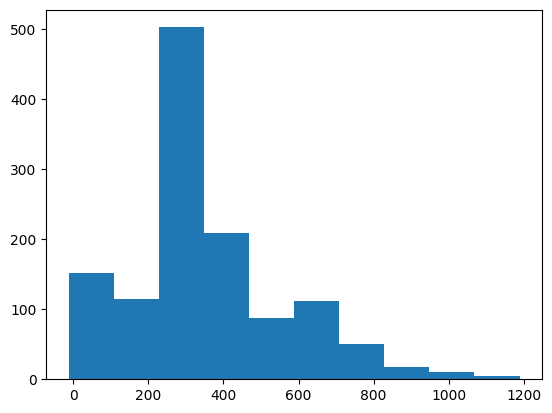

In [314]:
# Simulazione Distribuzione
capitale = 1000
tax_rate = 0.26

risultati_distribuzione = []

for i in range(0, len(data_etf)):
    num_quote = capitale / data_etf["Dist Price"][i]
    acc_distribuzione = ((num_quote * data_etf["Dist Price"][len(data_etf)-1]) - (num_quote * data_etf["Dist Price"][i]))*(1-tax_rate)
    div_distribuzione = []
    for k in range(len(data_etf)):
        if ((not math.isnan(data_etf["Dividends"][k])) & (data_etf["Date"][k] >= data_etf["Date"][i])):
            div_distribuzione.append(data_etf["Dividends"][k]*(1-tax_rate))
    dividendi = sum(div_distribuzione) * num_quote
    risultati_distribuzione.append(acc_distribuzione + dividendi)

plt.hist(risultati_distribuzione)

In [338]:
# Differenza
differenza = []
for i in range(len(risultati_distribuzione)):
    differenza.append(risultati_distribuzione[i] - risultati_accumulo[i])

plus_return = []
for k in range(len(risultati_distribuzione)):
    plus_return.append(float(round(differenza[k]/risultati_accumulo[k], 3)*100))

plus_return = plus_return[:-1]

np.mean(plus_return)
np.median(plus_return)

C:\Users\39340\AppData\Local\Temp\ipykernel_31920\2947665914.py:8: RuntimeWarning: invalid value encountered in scalar divide
  plus_return.append(float(round(differenza[k]/risultati_accumulo[k], 3)*100))


12.5